In [98]:
import os
import pandas as pd
from numpy import dot
from numpy.linalg import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=12)

In [99]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

In [100]:
rjstlf = pd.read_csv('data/건실기업.csv')
qneh = pd.read_csv('data/부도기업.csv')

In [101]:
# 라벨링
rjstlf['target'] = 0
qneh['target'] = 1

In [102]:
# 부도기업과 건실기업 합치기
merge = pd.concat([qneh, rjstlf])

In [103]:
merge.reset_index(drop=True, inplace=True)

In [108]:
# 회사이름으로 묶어서 평균내기
result = merge.groupby(by=merge['company']).mean()

In [109]:
result.head()

,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,매출총이익,법인세비용차감전순이익(손실),당기순이익(손실),target
company,,,,,,,,,,,,
A,1.039474e+11,1.132358e+12,7.445634e+10,3.469759e+10,5.803059e+11,5.838417e+11,1.965829e+11,5.402887e+10,7.657762e+09,-3.097174e+10,-2.447429e+10,1
B,1.730743e+11,3.976836e+11,4.876608e+10,5.556333e+11,6.134664e+11,7.398686e+11,2.788506e+11,3.727947e+10,2.776299e+09,-6.119228e+10,-5.637891e+10,1
C,1.266640e+11,6.551540e+11,5.086312e+11,5.652238e+11,3.388043e+11,5.828321e+11,1.648862e+11,4.504587e+10,5.223151e+09,-2.678225e+10,-8.906593e+09,1
D,1.394585e+11,2.167586e+11,2.168322e+11,4.620191e+11,1.053009e+12,8.268744e+11,5.311702e+11,3.226663e+10,2.044714e+10,-5.442661e+10,-7.074011e+10,1
DMS,1.508960e+11,3.061115e+11,4.708633e+10,3.323208e+10,1.552155e+11,1.482481e+11,1.480024e+11,1.569469e+10,6.749193e+10,1.608281e+10,1.209265e+10,0


In [11]:
# 데이터 원본 복사
result2 = result

In [12]:
# 인덱스 초기화
result2.reset_index(inplace=True)

In [13]:
result2.iloc[:, 1:]

,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,매출총이익,법인세비용차감전순이익(손실),당기순이익(손실),target
0,1.039474e+11,1.132358e+12,7.445634e+10,3.469759e+10,5.803059e+11,5.838417e+11,1.965829e+11,5.402887e+10,7.657762e+09,-3.097174e+10,-2.447429e+10,1
1,1.730743e+11,3.976836e+11,4.876608e+10,5.556333e+11,6.134664e+11,7.398686e+11,2.788506e+11,3.727947e+10,2.776299e+09,-6.119228e+10,-5.637891e+10,1
2,1.266640e+11,6.551540e+11,5.086312e+11,5.652238e+11,3.388043e+11,5.828321e+11,1.648862e+11,4.504587e+10,5.223151e+09,-2.678225e+10,-8.906593e+09,1
3,1.394585e+11,2.167586e+11,2.168322e+11,4.620191e+11,1.053009e+12,8.268744e+11,5.311702e+11,3.226663e+10,2.044714e+10,-5.442661e+10,-7.074011e+10,1
4,1.508960e+11,3.061115e+11,4.708633e+10,3.323208e+10,1.552155e+11,1.482481e+11,1.480024e+11,1.569469e+10,6.749193e+10,1.608281e+10,1.209265e+10,0
5,1.357290e+11,8.745248e+11,7.432313e+10,2.336855e+11,2.131715e+11,9.317890e+11,5.057464e+11,3.072040e+10,1.482981e+10,-2.901357e+10,-1.037151e+10,1
6,1.019936e+11,1.248840e+12,1.153317e+11,7.536776e+11,9.532763e+11,6.753589e+11,7.157536e+11,3.347873e+10,1.871691e+10,-4.956038e+10,-2.541449e+10,1
7,9.943021e+10,3.882262e+11,1.783215e+11,6.350406e+11,9.960730e+11,6.472152e+11,3.142280e+11,4.767616e+10,1.670410e+10,-5.863482e+10,-5.587686e+10,1
8,1.453903e+11,1.154514e+12,4.835734e+11,1.887074e+11,2.278715e+11,5.192398e+11,8.530421e+11,3.306622e+10,1.149298e+10,-5.916699e+10,-5.422846e+10,1
9,8.889541e+10,9.667424e+11,2.635837e+11,1.467639e+11,6.338400e+11,7.134137e+11,2.039357e+11,4.460180e+10,1.996494e+10,-6.156001e+10,-7.396272e+10,1


In [16]:
# 데이터프레임 저장
result2.to_csv('data/merge.csv')

### 코사인 유사도

In [14]:
similarity = cosine_similarity(result2.iloc[:,1:12])

In [15]:
similarity.shape

(38, 38)

In [45]:
a = pd.DataFrame(similarity, index = result2['company'] , columns=result2['company'])
a.index.name = ''
a.columns.name =''

In [18]:
a.head()

,A,B,C,D,DMS,E,F,G,H,I,...,금강제강,메디톡스,명성티엔에스,미코,배명금속,슈펙스비앤피,아바코,와이엔텍,원익IPS,풍림산업
,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.766995,0.793635,0.677642,0.918043,0.886182,0.893896,0.729935,0.847838,0.975298,...,0.929404,0.853704,0.884357,0.885616,0.918474,0.930951,0.818325,0.888542,0.771012,0.888695
B,0.766995,1.000000,0.868544,0.939523,0.766985,0.842731,0.903337,0.962442,0.687413,0.850982,...,0.852728,0.670097,0.743174,0.688869,0.794601,0.766327,0.715076,0.624850,0.611983,0.909274
C,0.793635,0.868544,1.000000,0.766233,0.790277,0.838184,0.873246,0.832942,0.821468,0.881706,...,0.863885,0.711059,0.766447,0.708557,0.792615,0.834886,0.758409,0.674842,0.655330,0.906873
D,0.677642,0.939523,0.766233,1.000000,0.700412,0.725815,0.835882,0.969934,0.626769,0.785139,...,0.793746,0.563829,0.672224,0.628596,0.731430,0.730190,0.656598,0.515155,0.538677,0.876177
DMS,0.918043,0.766985,0.790277,0.700412,1.000000,0.876280,0.887384,0.721139,0.893597,0.903791,...,0.967963,0.963797,0.982223,0.980096,0.972302,0.949604,0.959203,0.935789,0.940043,0.897011


In [19]:
# 데이터 프레임 저장
a.to_csv('data/cosine_similarity.csv', index=False)

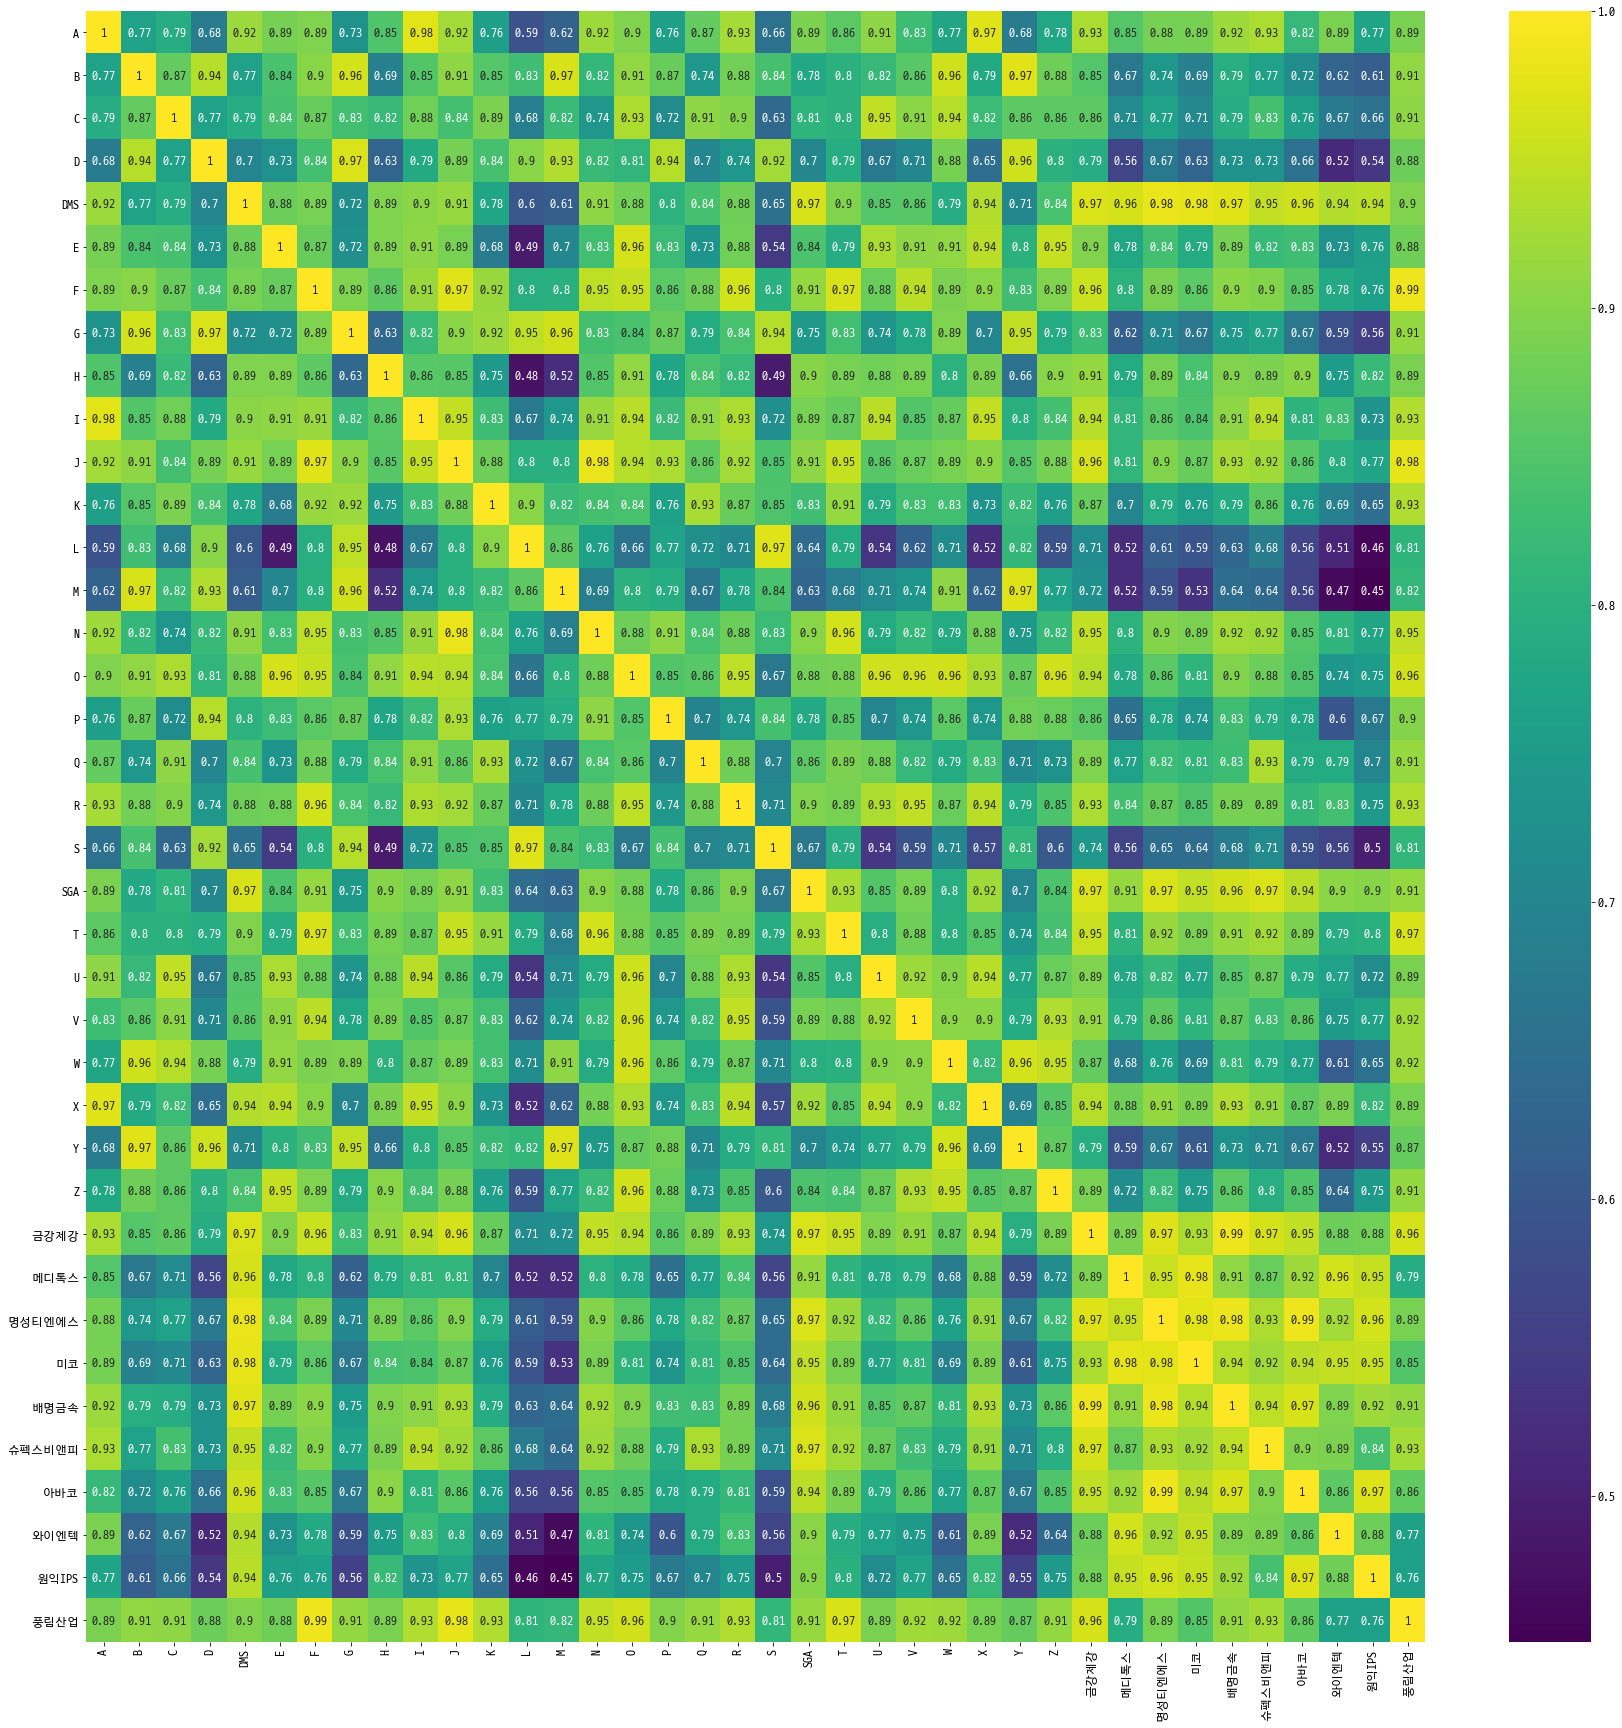

In [20]:
plt.figure(figsize=(30, 30))
sns.heatmap(similarity, xticklabels=result2['company'], yticklabels=result2['company'],cmap='viridis', annot=True)
plt.show()

### K-means Clustering
- result2 = indexing된 원본
- cs = 코사인 유사도

In [52]:
cs = pd.read_csv('data/cosine_similarity.csv')

In [105]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)

In [34]:
# indexing 된 원본 클러스터링
kmeans.fit(result2.iloc[:, 1:12])

KMeans(n_clusters=2, random_state=0)

In [35]:
k_indexing = result2

In [36]:
k_indexing['cluster'] = kmeans.labels_
k_indexing_clu = k_indexing.groupby(['target', 'cluster']).count()
k_indexing_clu

company  자본총계  자산총계  매입채무 및 기타유동채무  매출채권 및 기타유동채권  부채총계  유동부채  \
target cluster                                                                  
0      0              9     9     9              9              9     9     9   
1      0              2     2     2              2              2     2     2   
       1             27    27    27             27             27    27    27   

                유동자산  재고자산  매출총이익  법인세비용차감전순이익(손실)  당기순이익(손실)  
target cluster                                                 
0      0           9     9      9                9          9  
1      0           2     2      2                2          2  
       1          27    27     27               27         27

In [39]:
a.head()

,A,B,C,D,DMS,E,F,G,H,I,...,금강제강,메디톡스,명성티엔에스,미코,배명금속,슈펙스비앤피,아바코,와이엔텍,원익IPS,풍림산업
,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.766995,0.793635,0.677642,0.918043,0.886182,0.893896,0.729935,0.847838,0.975298,...,0.929404,0.853704,0.884357,0.885616,0.918474,0.930951,0.818325,0.888542,0.771012,0.888695
B,0.766995,1.000000,0.868544,0.939523,0.766985,0.842731,0.903337,0.962442,0.687413,0.850982,...,0.852728,0.670097,0.743174,0.688869,0.794601,0.766327,0.715076,0.624850,0.611983,0.909274
C,0.793635,0.868544,1.000000,0.766233,0.790277,0.838184,0.873246,0.832942,0.821468,0.881706,...,0.863885,0.711059,0.766447,0.708557,0.792615,0.834886,0.758409,0.674842,0.655330,0.906873
D,0.677642,0.939523,0.766233,1.000000,0.700412,0.725815,0.835882,0.969934,0.626769,0.785139,...,0.793746,0.563829,0.672224,0.628596,0.731430,0.730190,0.656598,0.515155,0.538677,0.876177
DMS,0.918043,0.766985,0.790277,0.700412,1.000000,0.876280,0.887384,0.721139,0.893597,0.903791,...,0.967963,0.963797,0.982223,0.980096,0.972302,0.949604,0.959203,0.935789,0.940043,0.897011


In [54]:
kmeans.fit(cs.T)

KMeans(n_clusters=2, random_state=0)

In [55]:
k_cs = cs

In [56]:
k_cs['target'] = result2.target
k_cs['cluster'] = kmeans.labels_

In [58]:
k_cs_clu = k_cs.groupby(['target', 'cluster']).count()
k_cs_clu

A   B   C   D  DMS   E   F   G   H   I  ...  금강제강  메디톡스  \
target cluster                                           ...               
0      0         9   9   9   9    9   9   9   9   9   9  ...     9     9   
1      0        19  19  19  19   19  19  19  19  19  19  ...    19    19   
       1        10  10  10  10   10  10  10  10  10  10  ...    10    10   

                명성티엔에스  미코  배명금속  슈펙스비앤피  아바코  와이엔텍  원익IPS  풍림산업  
target cluster                                                    
0      0             9   9     9       9    9     9      9     9  
1      0            19  19    19      19   19    19     19    19  
       1            10  10    10      10   10    10     10    10  

[3 rows x 38 columns]

### 계산

In [126]:
cal = result

In [127]:
cal.reset_index(inplace=True)

In [151]:
# cal.drop(['cluster'], axis=1, inplace=True)

In [128]:
cal.head()

,index,company,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,매출총이익,법인세비용차감전순이익(손실),당기순이익(손실),target,자기자본비율,재고자산 회전율,매입채무 회전율,유동비율,부채비율
0,0,A,1.039474e+11,1.132358e+12,7.445634e+10,3.469759e+10,5.803059e+11,5.838417e+11,1.965829e+11,5.402887e+10,7.657762e+09,-3.097174e+10,-2.447429e+10,1,0.091797,0.141735,0.102849,0.336706,5.582686
1,1,B,1.730743e+11,3.976836e+11,4.876608e+10,5.556333e+11,6.134664e+11,7.398686e+11,2.788506e+11,3.727947e+10,2.776299e+09,-6.119228e+10,-5.637891e+10,1,0.435206,0.074473,0.056931,0.376892,3.544526
2,2,C,1.266640e+11,6.551540e+11,5.086312e+11,5.652238e+11,3.388043e+11,5.828321e+11,1.648862e+11,4.504587e+10,5.223151e+09,-2.678225e+10,-8.906593e+09,1,0.193335,0.115952,0.010269,0.282905,2.674827
3,3,D,1.394585e+11,2.167586e+11,2.168322e+11,4.620191e+11,1.053009e+12,8.268744e+11,5.311702e+11,3.226663e+10,2.044714e+10,-5.442661e+10,-7.074011e+10,1,0.643382,0.633693,0.094299,0.642383,7.550696
4,4,DMS,1.508960e+11,3.061115e+11,4.708633e+10,3.323208e+10,1.552155e+11,1.482481e+11,1.480024e+11,1.569469e+10,6.749193e+10,1.608281e+10,1.209265e+10,0,0.492945,4.300303,1.433366,0.998342,1.028626


In [129]:
cal['자기자본비율'] = cal.자본총계 / cal.자산총계

In [130]:
cal['재고자산 회전율'] = cal.매출총이익 / cal.재고자산
# cal['자산총계 회전율'] = cal.매출총이익 / cal.자산총계
cal['매입채무 회전율'] = cal.매출총이익 / cal['매입채무 및 기타유동채무']
cal['유동비율'] = cal.유동자산 / cal.유동부채
cal['부채비율'] = cal.부채총계 / cal.자본총계

In [116]:
cal.head()

,company,자본총계,자산총계,매입채무 및 기타유동채무,매출채권 및 기타유동채권,부채총계,유동부채,유동자산,재고자산,매출총이익,법인세비용차감전순이익(손실),당기순이익(손실),target,자기자본비율,재고자산 회전율,매입채무 회전율,유동비율,부채비율
0,A,1.039474e+11,1.132358e+12,7.445634e+10,3.469759e+10,5.803059e+11,5.838417e+11,1.965829e+11,5.402887e+10,7.657762e+09,-3.097174e+10,-2.447429e+10,1,0.091797,0.141735,0.102849,0.336706,5.582686
1,B,1.730743e+11,3.976836e+11,4.876608e+10,5.556333e+11,6.134664e+11,7.398686e+11,2.788506e+11,3.727947e+10,2.776299e+09,-6.119228e+10,-5.637891e+10,1,0.435206,0.074473,0.056931,0.376892,3.544526
2,C,1.266640e+11,6.551540e+11,5.086312e+11,5.652238e+11,3.388043e+11,5.828321e+11,1.648862e+11,4.504587e+10,5.223151e+09,-2.678225e+10,-8.906593e+09,1,0.193335,0.115952,0.010269,0.282905,2.674827
3,D,1.394585e+11,2.167586e+11,2.168322e+11,4.620191e+11,1.053009e+12,8.268744e+11,5.311702e+11,3.226663e+10,2.044714e+10,-5.442661e+10,-7.074011e+10,1,0.643382,0.633693,0.094299,0.642383,7.550696
4,DMS,1.508960e+11,3.061115e+11,4.708633e+10,3.323208e+10,1.552155e+11,1.482481e+11,1.480024e+11,1.569469e+10,6.749193e+10,1.608281e+10,1.209265e+10,0,0.492945,4.300303,1.433366,0.998342,1.028626


In [133]:
cal2 = cal.iloc[:, 12:]

In [134]:
cal2

,당기순이익(손실),target,자기자본비율,재고자산 회전율,매입채무 회전율,유동비율,부채비율
0,-2.447429e+10,1,0.091797,0.141735,0.102849,0.336706,5.582686
1,-5.637891e+10,1,0.435206,0.074473,0.056931,0.376892,3.544526
2,-8.906593e+09,1,0.193335,0.115952,0.010269,0.282905,2.674827
3,-7.074011e+10,1,0.643382,0.633693,0.094299,0.642383,7.550696
4,1.209265e+10,0,0.492945,4.300303,1.433366,0.998342,1.028626
5,-1.037151e+10,1,0.155203,0.482735,0.199532,0.542769,1.570566
6,-2.541449e+10,1,0.081671,0.559069,0.162288,1.059812,9.346431
7,-5.587686e+10,1,0.256114,0.350366,0.093674,0.485508,10.017810
8,-5.422846e+10,1,0.125932,0.347575,0.023767,1.642867,1.567309
9,-7.396272e+10,1,0.091954,0.447626,0.075744,0.285859,7.130176


In [135]:
cal2['company'] = cal.company

In [136]:
cal2.head()

,당기순이익(손실),target,자기자본비율,재고자산 회전율,매입채무 회전율,유동비율,부채비율,company
0,-2.447429e+10,1,0.091797,0.141735,0.102849,0.336706,5.582686,A
1,-5.637891e+10,1,0.435206,0.074473,0.056931,0.376892,3.544526,B
2,-8.906593e+09,1,0.193335,0.115952,0.010269,0.282905,2.674827,C
3,-7.074011e+10,1,0.643382,0.633693,0.094299,0.642383,7.550696,D
4,1.209265e+10,0,0.492945,4.300303,1.433366,0.998342,1.028626,DMS


In [144]:
cal2.iloc[:, [0,2, 3,4,5,6]]

,당기순이익(손실),자기자본비율,재고자산 회전율,매입채무 회전율,유동비율,부채비율
0,-2.447429e+10,0.091797,0.141735,0.102849,0.336706,5.582686
1,-5.637891e+10,0.435206,0.074473,0.056931,0.376892,3.544526
2,-8.906593e+09,0.193335,0.115952,0.010269,0.282905,2.674827
3,-7.074011e+10,0.643382,0.633693,0.094299,0.642383,7.550696
4,1.209265e+10,0.492945,4.300303,1.433366,0.998342,1.028626
5,-1.037151e+10,0.155203,0.482735,0.199532,0.542769,1.570566
6,-2.541449e+10,0.081671,0.559069,0.162288,1.059812,9.346431
7,-5.587686e+10,0.256114,0.350366,0.093674,0.485508,10.017810
8,-5.422846e+10,0.125932,0.347575,0.023767,1.642867,1.567309
9,-7.396272e+10,0.091954,0.447626,0.075744,0.285859,7.130176


In [145]:
kmeans.fit(cal2.iloc[:, [0,2, 3,4,5,6]])

KMeans(n_clusters=2, random_state=0)

In [146]:
cal2['cluster'] = kmeans.labels_
k_cal2 = cal2.groupby(['target', 'cluster']).count()
k_cal2

당기순이익(손실)  자기자본비율  재고자산 회전율  매입채무 회전율  유동비율  부채비율  company
target cluster                                                            
0      0                7       7         7         7     7     7        7
       1                2       2         2         2     2     2        2
1      0                9       9         9         9     9     9        9
       1               20      20        20        20    20    20       20

In [149]:
cal2['당기순이익(손실)'] = pd.to_numeric(cal2['당기순이익(손실)'])

In [150]:
cal2

,당기순이익(손실),target,자기자본비율,재고자산 회전율,매입채무 회전율,유동비율,부채비율,company,cluster
0,-2.447429e+10,1,0.091797,0.141735,0.102849,0.336706,5.582686,A,1
1,-5.637891e+10,1,0.435206,0.074473,0.056931,0.376892,3.544526,B,1
2,-8.906593e+09,1,0.193335,0.115952,0.010269,0.282905,2.674827,C,0
3,-7.074011e+10,1,0.643382,0.633693,0.094299,0.642383,7.550696,D,1
4,1.209265e+10,0,0.492945,4.300303,1.433366,0.998342,1.028626,DMS,0
5,-1.037151e+10,1,0.155203,0.482735,0.199532,0.542769,1.570566,E,0
6,-2.541449e+10,1,0.081671,0.559069,0.162288,1.059812,9.346431,F,1
7,-5.587686e+10,1,0.256114,0.350366,0.093674,0.485508,10.017810,G,1
8,-5.422846e+10,1,0.125932,0.347575,0.023767,1.642867,1.567309,H,1
9,-7.396272e+10,1,0.091954,0.447626,0.075744,0.285859,7.130176,I,1
